# Knn na doença não separável linearmente

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('nova_doenca2.csv',sep=';')
df

,indicador1,indicador2,diagnóstico
0,1,3,1
1,2,3,0
2,2,8,1
3,5,8,0
4,8,10,1
5,3,1,0
6,6,4,0
7,6,3,1
8,8,2,1
9,9,7,0


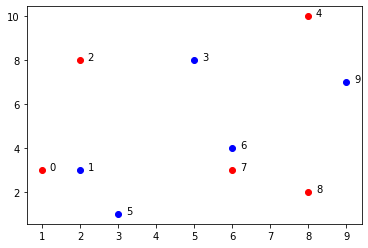

In [41]:
for i in range(len(df)):
    if df['diagnóstico'].iloc[i]==1:
        plt.plot(df.iloc[i,0],df.iloc[i,1],'ro')
    else:
        plt.plot(df.iloc[i,0],df.iloc[i,1],'bo')
    plt.text(df.iloc[i,0]+0.2,df.iloc[i,1], str(i))
plt.show()

Obter a acurácia com regressão logística e sklearn

In [19]:
from sklearn.linear_model import LogisticRegression
rl=LogisticRegression()
# X=np.array(df)[:,:2]
X=np.array(df)[:,:-1] # Todas as linhas e coluna da 0 até a penúltima (-1)
y = np.array(df['diagnóstico'])
X,y

rl.fit(X,y) # 'Fita' o modelo
ye=rl.predict(X) # ye = y estimado
accuracy_score(y, ye) # Verifica o erro da classificação - y = y_true; ye = y_predicted

0.5

Crie a função dist, com a distância Euclidiana entre dois vetores

In [26]:
def dist(v1,v2):
    return np.linalg.norm(v2-v1)



Teste a função dist com os vetores (1,1) e (2,2)...o resultado deve ser 1.414..

In [27]:
dist(np.array([1,1]), np.array([2,2]))

1.4142135623730951

Crie uma função v_dist que retornará um array (ordenado pela distância do vetor v a cada linha de X) com tuplas t, sendo t[0]:distância, t[1] a linha de X e t[2] o y correspondente à linha

In [36]:
def v_dist(v,X,y):
    vd=[]
    for i in range(len(X)):
        vd.append((i, np.linalg.norm(v-X[i]), y[i])) # Adiciona à lista vd o índice i, a norma euclidiana e 
                                                     # qual o y daquele ponto, repectivamente
    vd.sort(key=lambda x:x[1]) # Reorganiza (sort) à partir do segundo elemento da lista (distância do ponto 
                               # v para o ponto X)
    
    return np.array(vd)

In [40]:
v_dist(np.array([7,2]), X, y)

array([[8.        , 1.        , 1.        ],
       [7.        , 1.41421356, 1.        ],
       [6.        , 2.23606798, 0.        ],
       [5.        , 4.12310563, 0.        ],
       [1.        , 5.09901951, 0.        ],
       [9.        , 5.38516481, 0.        ],
       [0.        , 6.08276253, 1.        ],
       [3.        , 6.32455532, 0.        ],
       [2.        , 7.81024968, 1.        ],
       [4.        , 8.06225775, 1.        ]])

Crie uma função de predição, que recebe v,X e y e retorna a classe prevista, suponha k=5

In [63]:
# O k = 5 significa que serão levados em consideração os 5 pontos mais próximos do ponto à ser previsto
def predict(v,X,y):
    d=v_dist(v,X,y)
    soma=0
    for i in range(5): # k = 5 <-> range(5)
        soma+=d[i,2] # soma o terceiro elemento (classe) da lista d
    
    if soma>2:return 1 # Se a soma for maior que 2, significa que existem pelo 3 pontos da classe 1 próximo ao
                       # ponto v
    else:return 0 # Se for menor que, significa que os pontos da classe 0 são maioria ao redor do ponto v
    #coloque seu código aqui..supondo knn com k=5
    



In [64]:
predict([7,3], X, y)

0

Calcular a acurácia na amostra toda

In [66]:
ye=[]
for i in range(len(X)):
    ye.append(predict(X[i],X,y))
ye=np.array(ye)   
accuracy_score(y,ye)

0.6